In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fe_gmx import AWH_Ensemble, AWH_2D_Ensemble

In [3]:
awh_ensemble = AWH_2D_Ensemble('../AWH_FEP/', regenerate_awh=True)

                        :-) GROMACS - gmx awh, 2023 (-:

Executable:   /opt/tcbsys/gromacs/2023/gmx/AVX2_256/bin/gmx
Data prefix:  /opt/tcbsys/gromacs/2023/gmx/AVX2_256
Working dir:  /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/awh_result
Command line:
  gmx awh -f /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/rep1/awh.edr -o awh.xvg -s /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/rep1/awh.tpr -skip 10 -more

Opened /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/rep1/awh.edr as single precision energy file
Reading file /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/rep1/awh.tpr, VERSION 2023 (single precision)
Last energy frame read 3283 time 65657.000         

GROMACS reminds you: "Suzy is a headbanger, her mother is a geek" (The Ramones)



Found 329 awh_pmf files.
The latest awh_pmf file is /nethome/yzhuang/cephfs/nachrs_modulator/AWH_2D/test/AWH_FEP/awh_result/awh_t65600.xvg
The latest awh_pmf file was generated at 2023-07-19 15:08:04
Found 8 walkers.
The latest walker was generated at 2023-07-21 12:40:38
Generating pulling data...
Generating dH/dl data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 329/329 [00:15<00:00, 21.80it/s]


In [2]:
awh_ensemble = AWH_2D_Ensemble('../../../BFE_nachrs/EPJ/EPJ_wt/AWH_FEP/AWH_2D_PORE_FEP',
                               regenerate_awh=True, tmp=True)

         Creating a tmp folder tmp.
Found 587 awh_pmf files.
The latest awh_pmf file is /nethome/yzhuang/cephfs/nachrs_modulator/BFE_nachrs/EPJ/EPJ_wt/AWH_FEP/AWH_2D_PORE_FEP/awh_result/awh_t117200.xvg
The latest awh_pmf file was generated at 2023-07-19 14:00:58
Found 8 walkers.
The latest walker was generated at 2023-07-19 13:56:00
Generating pulling data...
Generating dH/dl data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 587/587 [00:09<00:00, 60.40it/s]


In [3]:
awh_ensemble.awh_log[0]

AWH_LOG(filename=/nethome/yzhuang/cephfs/nachrs_modulator/BFE_nachrs/EPJ/EPJ_wt/AWH_FEP/AWH_2D_PORE_FEP/rep1/awh.log, index=0), covering_times=[40112, 42096], equlibrated_histogram_time=40112, out_of_initial_stage_time=42096

In [4]:
awh_pmf = awh_ensemble.awh_results.pmf[-1]

In [5]:
generate_video=True
if generate_video:
    levels=np.linspace(0, 80, 20)
    awh_ensemble.generate_pmf_video(
                            name='pmf_fep',
                            stride=1,
                            remove_img=True,
                            ffmpeg='/nethome/yzhuang/FFmpeg/ffmpeg',
                            levels=levels,
    )

100%|██████████| 587/587 [01:53<00:00,  5.18it/s]


ffmpeg version N-96086-g3530fdc78e Copyright (c) 2000-2019 the FFmpeg developers
built with gcc 7 (Ubuntu 7.4.0-1ubuntu1~18.04.1)
configuration: --disable-x86asm
libavutil      56. 36.101 / 56. 36.101
libavcodec     58. 65.100 / 58. 65.100
libavformat    58. 35.101 / 58. 35.101
libavdevice    58.  9.101 / 58.  9.101
libavfilter     7. 69.101 /  7. 69.101
libswscale      5.  6.100 /  5.  6.100
libswresample   3.  6.100 /  3.  6.100
Input #0, image2, from 'pmf_fep_%d.png':
Duration: 00:01:57.40, start: 0.000000, bitrate: N/A
Stream #0:0: Video: png, rgba(pc), 700x900 [SAR 3937:3937 DAR 7:9], 5 fps, 5 tbr, 5 tbn, 5 tbc
Please use -b:a or -b:v, -b is ambiguous
Stream mapping:
Stream #0:0 -> #0:0 (png (native) -> mpeg4 (native))
Press [q] to stop, [?] for help
Output #0, mp4, to 'pmf_fep.mp4':
Metadata:
encoder         : Lavf58.35.101
Stream #0:0: Video: mpeg4 (mp4v / 0x7634706D), yuv420p, 700x900 [SAR 1:1 DAR 7:9], q=2-31, 5000 kb/s, 30 fps, 15360 tbn, 30 tbc
Metadata:
encoder         : La

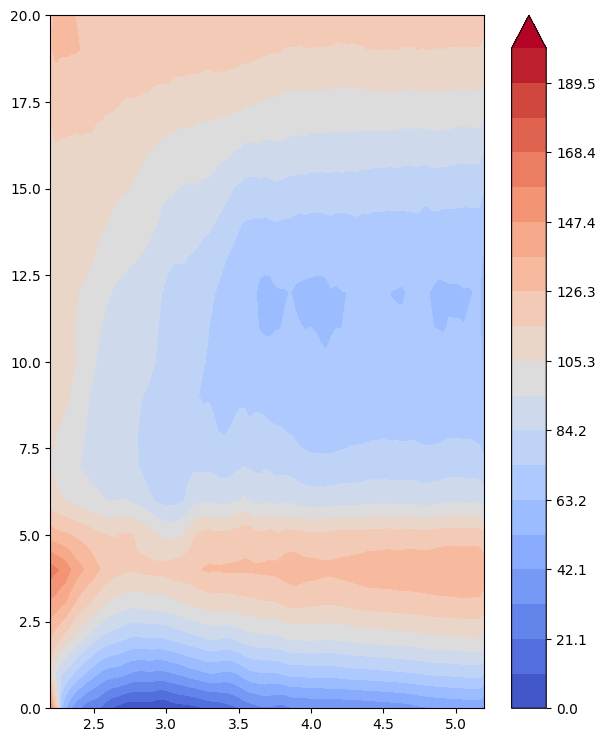

In [7]:
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,2].T

levels=np.linspace(0, 200, 20)

fig, ax = plt.subplots(figsize=(7,9))
mappable = ax.contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            vmax=levels.max(),
            levels=levels,
            extend='max',
            cmap='coolwarm')
plt.colorbar(mappable)

<Axes: xlabel='dim_2', ylabel='Probability'>

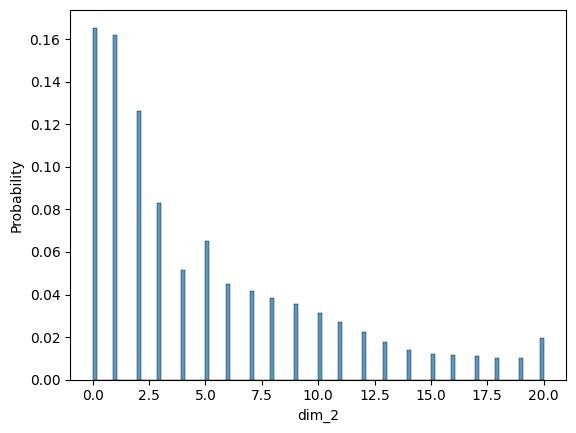

In [19]:
import pandas as pd
dhdl_data = [dhdl.data for dhdl in awh_ensemble.awh_dhdl]

dhdl_df = pd.concat(dhdl_data)
sns.histplot(x='dim_2',
            data=dhdl_df,
            stat='probability')

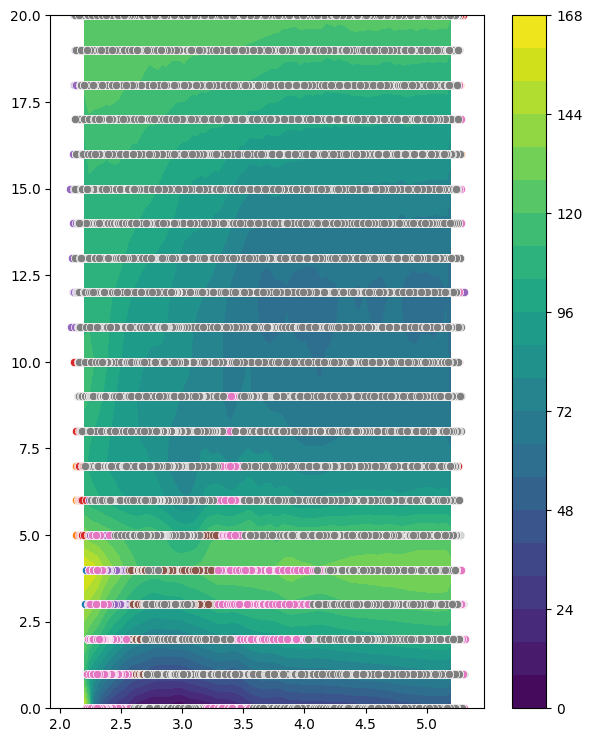

In [20]:
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,2].T

fig, ax = plt.subplots(figsize=(7,9))
mappable = ax.contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
#                vmax=100,
            levels=20)

for awh_pullx, awh_dhdl in zip(awh_ensemble.awh_pullx,
                                awh_ensemble.awh_dhdl):
    sns.scatterplot(x=awh_pullx.data[::]['dim_4'].values,
                y=awh_dhdl.data[::]['dim_2'].values)

plt.colorbar(mappable)

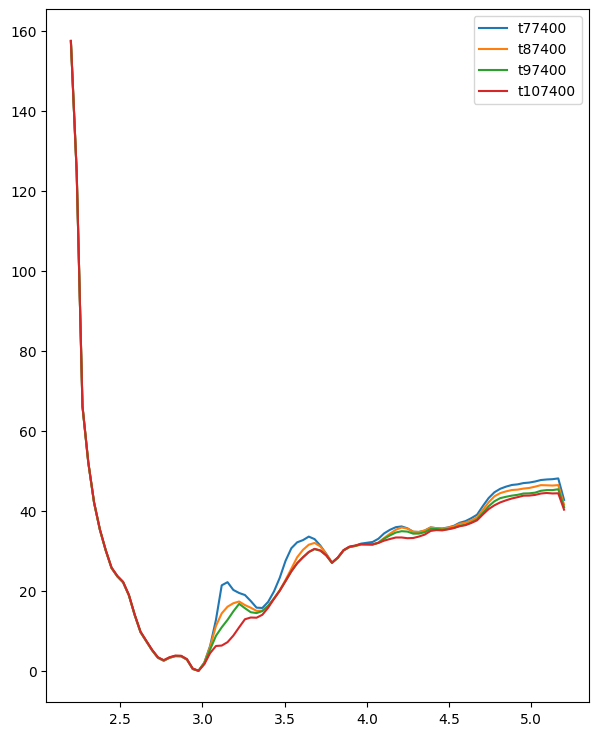

In [8]:
fig, ax = plt.subplots(figsize=(7,9))

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-200::50],
                         awh_ensemble.awh_results.pmf[-200::50]):
        awh_cv1 = awh_pmf.T[0][0]
        awh_fes = awh_pmf[:, 0, 2]
        ax.plot(
                awh_cv1,
                awh_fes,
                label=time
                )
plt.legend()

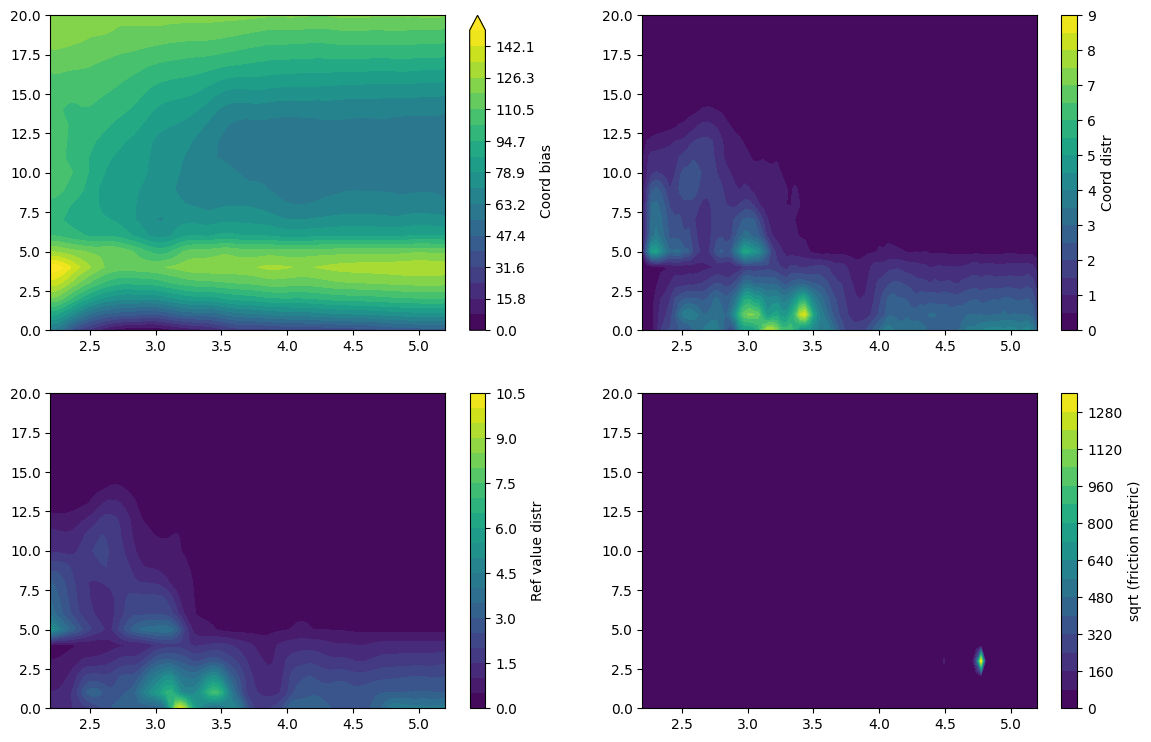

In [9]:
fig, axes = plt.subplots(2,2, figsize=(14,9))
awh_cv1 = awh_pmf.T[0][0]
awh_cv2 = awh_pmf[0].T[1]
awh_fes = awh_pmf[:,:,3].T
levels=np.linspace(0, 150, 20)
mappable = axes[0][0].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            vmax=levels.max(),
            levels=levels,
            extend='max',
            alpha=1)
plt.colorbar(mappable, label='Coord bias')

awh_fes = awh_pmf[:,:,4].T
mappable = axes[0][1].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='Coord distr')

awh_fes = awh_pmf[:,:,5].T
mappable = axes[1][0].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='Ref value distr')

awh_fes = awh_pmf[:,:,7].T
mappable = axes[1][1].contourf(
            awh_cv1,
            awh_cv2,
            awh_fes,
            levels=20,
            alpha=1)
plt.colorbar(mappable, label='sqrt (friction metric)')

for ax in axes.flatten():
    ax.set_xlim(2.2, 5.2)
    ax.set_ylim(0, 20)

In [10]:
# get absolute binding free energy

def get_binding_kinectics(r,
                          pmf,
                          binding_range,
                          ax,
                          r_star_ind=-10,
                          temperature=300,
                          printing=False):
    """
    K_eq = pi * integral_in_binding_site(exp(-beta * w(r)) dr)
    dG = -RT * ln(K_eq / 1661)
    Parameters
    ----------
    r: np.ndarray
        The distance in Å.
    pmf : np.ndarray
        The PMF in kJ/mol.
    binding_range : tuple
        The binding region in Å.
    ax : matplotlib.axes.Axes
        The axes to plot on.
    r_star_ind : int, optional, default=-10
        The index of the r*.
        r* is the unbound area.
        W(r*) = −kT ln(α r * 2) must hold,
        α is a constant.
    temperature : float, optional, default=300
        The temperature in Kelvin.
    printing : bool, optional, default=False
        If True, print the results.
    """
    kT = 0.00831446261815324 * temperature
    beta = 1 / kT
    r_start = r[r_star_ind]
    w_r = pmf - pmf[r_star_ind]
    # get the binding region
    binding_region = np.where((r > binding_range[0]) & (r < binding_range[1]))

    ax.plot(r, w_r, c='black')
    ax.plot(r[r_star_ind], w_r[r_star_ind], 'o', c='red')

    r_binding = r[binding_region][1:]
    w_r_binding = w_r[binding_region][1:]
    ax.plot(r_binding, w_r_binding, c='red')
    k_eq = 2 * np.pi * r_start * 20 / 5
    k_eq = k_eq * np.trapz(np.exp(-beta * w_r_binding), r_binding)
    dG_bind = -kT * np.log(k_eq / 1661.)
    if printing:
        print(f'r* = {r_start} Å')
        print(f'K_eq = {k_eq}')
        print(f'dG_bind = {dG_bind} kJ/mol')
        print(f'dG_bind = {dG_bind / 4.194} kcal/mol')

    return k_eq, dG_bind

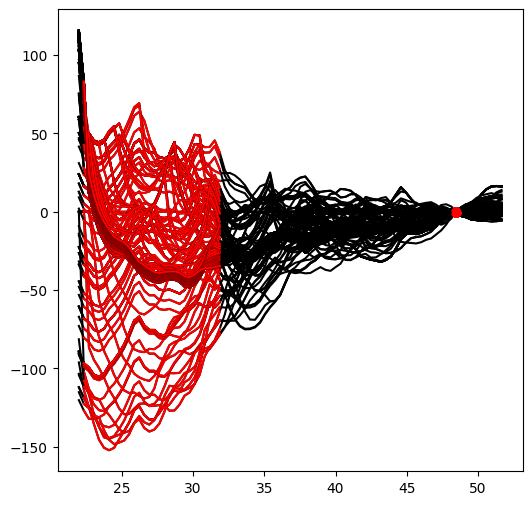

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds", n_colors=10)
fig, ax = plt.subplots(figsize=(6,6), sharey=True)
binding_fes = []
for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[::2],
                            awh_ensemble.awh_results.pmf[::2],
                            ):
    sel_lambda = 0
    awh_r = awh_pmf[:-1, sel_lambda, 0].T
    awh_fes = awh_pmf[:-1, sel_lambda, 2].T 
    
    k_eq, dG_bind = get_binding_kinectics(awh_r * 10,
                                          awh_fes,
                                          ax=ax,
                                          binding_range=(20,32))
    binding_fes.append([eval(time[1:]), dG_bind])
plt.show()

binding_fes = np.array(binding_fes)

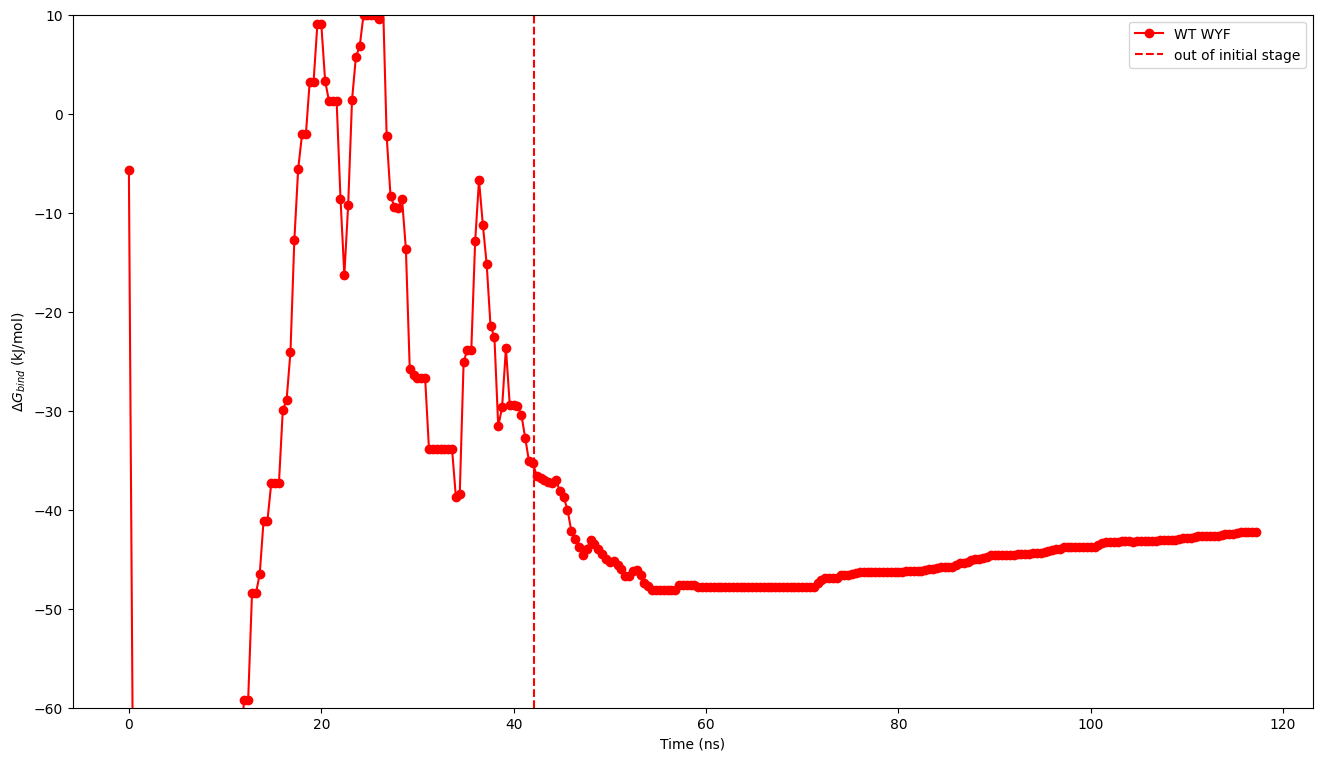

In [12]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(binding_fes.T[0] / 1000, binding_fes.T[1], 'o-', label='WT WYF',
        color='red'
        )
o_e_t = awh_ensemble.awh_log[0].out_of_initial_stage_time
if o_e_t is not None:
    ax.axvline(o_e_t/1000, color='red', linestyle='--', label=f'out of initial stage')
ax.set_ylabel(r'$\Delta G_{bind}$ (kJ/mol)')
ax.set_xlabel('Time (ns)')
ax.set_ylim(-60, 10)
ax.legend(bbox_to_anchor=(1,1))

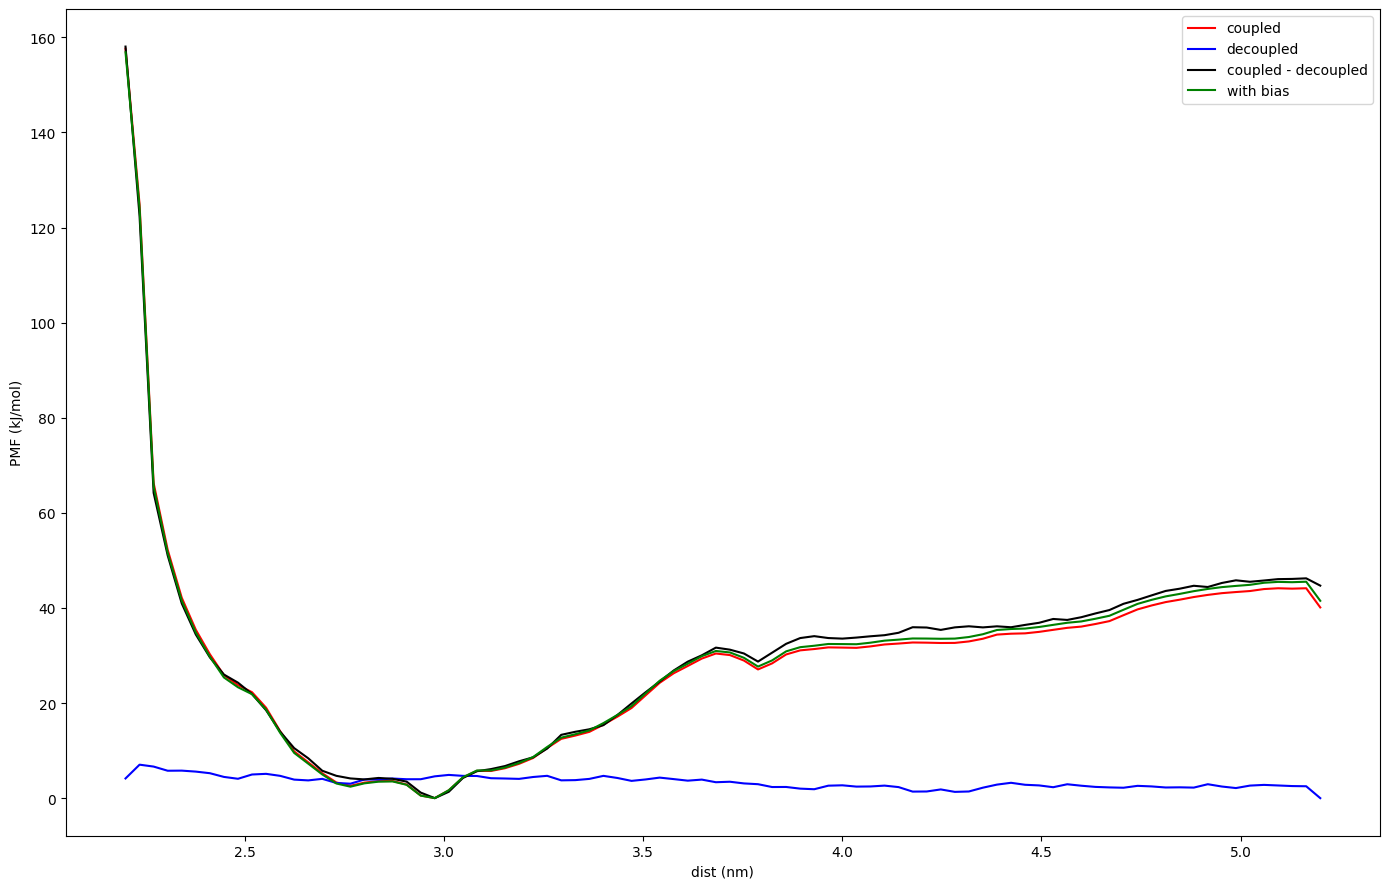

In [13]:
fig, ax = plt.subplots(figsize=(14,9))

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-1::5],
                         awh_ensemble.awh_results.pmf[-1::5]):
    sel_lambda = 0
    awh_r = awh_pmf[:, sel_lambda, 0].T
    awh_fes = awh_pmf[:, sel_lambda, 2].T
    awh_fes = awh_fes - np.nanmin(awh_fes[awh_fes != -np.inf])
    ax.plot(awh_r, awh_fes, color='red', label=f'coupled')
#    ax.set_title('{:.0f} ns PMF'.format(eval(time[1:]) / 1000), fontsize=20)

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-1::5],
                         awh_ensemble.awh_results.pmf[-1::5]):
    sel_lambda = -1
    awh_r = awh_pmf[:, sel_lambda, 0].T
    awh_fes = awh_pmf[:, sel_lambda, 2].T
    awh_fes = awh_fes - np.nanmin(awh_fes[awh_fes != -np.inf])
    ax.plot(awh_r, awh_fes, color='blue', label=f'decoupled')
    ax.legend()
    ax.set_ylabel(f'PMF (kJ/mol)')
    ax.set_xlabel('dist (nm)')

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-1::5],
                         awh_ensemble.awh_results.pmf[-1::5]):
    sel_lambda = 0
    awh_r = awh_pmf[:, sel_lambda, 0].T
    awh_fes = awh_pmf[:, sel_lambda, 2].T - awh_pmf[:, -1, 2].T
    awh_fes = awh_fes - np.nanmin(awh_fes[awh_fes != -np.inf])
    awh_fes_c_d = awh_fes
    ax.plot(awh_r, awh_fes, color='black', label=f'coupled - decoupled')

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-1::5],
                         awh_ensemble.awh_results.pmf[-1::5]):
    sel_lambda = 0
    awh_r = awh_pmf[:, sel_lambda, 0].T
    awh_pmf_r_bias = np.log(awh_pmf[:, sel_lambda, 0].T) * awh_ensemble.kT
    awh_fes = awh_pmf[:, sel_lambda, 2].T + awh_pmf_r_bias
    awh_fes = awh_fes - np.nanmin(awh_fes[awh_fes != -np.inf])
    awh_fes_unbiased = awh_fes
    ax.plot(awh_r, awh_fes, color='green',label=f'with bias')

    ax.set_ylabel(f'PMF (kJ/mol)')
    ax.set_xlabel('dist (nm)')
    ax.legend()
#    ax.set_title('{:.0f} ns PMF'.format(eval(time[1:]) / 1000), fontsize=20)
plt.tight_layout()
plt.show()